
# Programa Ejemplo para Realizar Aprendizaje Supervisado

## Etapa 1: Entendimiento de los datos
Antes de comenzar incluso a preprocesar los datos, debemos conocer las características del conjunto de datos que tenemos.

Como mínimo debemos saber:
-  Cuántos registros hay?
-  Cuantos atributos tiene cada registro?
-  De qué tipo son los atributos?

Además:
-  Obtener una medida de centralidad para cada atributo
-  Obtener una medida de dispersión o desviación para los atributos que ésto tenga sentido
-  Calcular la matriz de correlación de los atributos de entrada para identificar atributos redundantes

Como paso previo al preprocesamiento de los datos, debemos:
-  Detectar si hay datos faltantes (determinar en qué columnas y cuantos datos faltan en un mismo registro)
-  Detectar si hay datos atípicos
-  Detectar si hay desbalance entre clases

Notar que en esta etapa no hacemos ninguna modificación sobre los datos, sólo estamos conociéndolos a fondo para saber con qué material contamos para trabajar.


In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

url="https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url, header=None, na_values=" ?")

# Se etiquetan las columnas para poder interpretar más fácilmente los datos.
# Cada fila es un ejemplo, cada columna un atributo.
# La columna llamada C es el atributo a predecir
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation',
              'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hpw', 'Country', 'C']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = data.shape
shape

(32561, 15)

In [3]:
#Cual es el tipo de los atributos?
data.dtypes

,0
Age,int64
Workclass,object
Fnlwgt,int64
Education,object
Education-num,int64
Marital-status,object
Occupation,object
Relationship,object
Race,object
Sex,object


In [4]:
#Medida de centralidad y desviación para atributos numéricos:
data.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


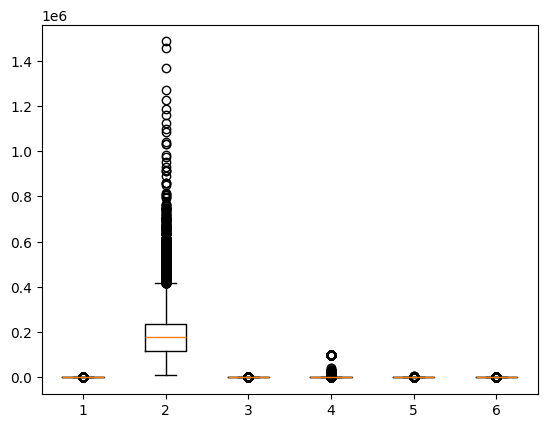

In [5]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((data['Age'],data['Fnlwgt'],data['Education-num'],data['Capital-gain'],data['Capital-loss'], data['Hpw']))
plt.show()

In [6]:
#Medida de centralidad para atributos categóricos:
data.mode()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,36.0,Private,123011,HS-grad,9.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1,NaN,NaN,164190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,203488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Correlación entre los atributos de entrada numéricos
# Permite detectar si hay atributos redundantes (correlación mayor a 0.85 o menor a -0.85)
numerical_features = data.select_dtypes(include=np.number)
numerical_features.corr()

#data.corr()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hpw
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hpw,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [8]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(data.isnull().sum(axis=1))

3

In [9]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

,0
Age,0
Workclass,1836
Fnlwgt,0
Education,0
Education-num,0
Marital-status,0
Occupation,1843
Relationship,0
Race,0
Sex,0


In [10]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?

print(data['C'].value_counts())

C
<=50K    24720
>50K      7841
Name: count, dtype: int64


## Etapa 2: Preparación de los datos
De acuerdo a lo observado en la etapa 1, se define una secuencia de actividades que modifican los datos para eliminar las situaciones que puedan ser causa de fallo o deficiencia en el proceso de aprendizaje. En este caso se van a realizar las siguientes actividades:


1.   Completar los datos faltantes utilizando la media para atributos numéricos y la moda para atributos categóricos.
2.   Convertir los atributos categóricos a escala numérica.
3.   Normalizar los valores de algunos los atributos.
4.   Balancear las clases eliminando registros de la clase mayoritaria.






In [11]:
# Se reemplazan los datos faltantes (NaN) por la moda de cada atributo.
data["Workclass"].fillna("Private", inplace = True)
data["Occupation"].fillna("Prof-specialty", inplace = True)
data["Country"].fillna("United-States", inplace = True)
data.head()

<ipython-input-11-748dc70a9c2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Workclass"].fillna("Private", inplace = True)
<ipython-input-11-748dc70a9c2f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
data['Country'] = labelencoder.fit_transform(data['Country'])
data['Occupation'] = labelencoder.fit_transform(data['Occupation'])
data['Workclass'] = labelencoder.fit_transform(data['Workclass'])
data['Education'] = labelencoder.fit_transform(data['Education'])
data['Marital-status'] = labelencoder.fit_transform(data['Marital-status'])
data['Relationship'] = labelencoder.fit_transform(data['Relationship'])
data['Race'] = labelencoder.fit_transform(data['Race'])
data['Sex'] = labelencoder.fit_transform(data['Sex'])
data['C'] = labelencoder.fit_transform(data['C'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [13]:
from sklearn import preprocessing

# Se normalizan los tres atributos seleccionados
data['Fnlwgt'] = preprocessing.scale(data['Fnlwgt'])
data['Capital-gain'] = preprocessing.scale(data['Capital-gain'])
data['Capital-loss'] = preprocessing.scale(data['Capital-loss'])
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hpw,Country,C
0,39,6,-1.063611,9,13,4,0,1,4,1,0.148453,-0.21666,40,38,0
1,50,5,-1.008707,9,13,2,3,0,4,1,-0.145920,-0.21666,13,38,0
2,38,3,0.245079,11,9,0,5,1,4,1,-0.145920,-0.21666,40,38,0
3,53,3,0.425801,1,7,2,5,0,2,1,-0.145920,-0.21666,40,38,0
4,28,3,1.408176,9,13,2,9,5,2,0,-0.145920,-0.21666,40,4,0


In [14]:
# Se hace balanceo de clases eliminando ejemplos de la clase mayoritaria
g = data.groupby('C')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
dataBal

<ipython-input-14-5a53e21d1c3a>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


Age  Workclass    Fnlwgt  Education  Education-num  Marital-status  \
C                                                                            
0 0      57          8 -0.493806         11              9               2   
  1      17          3  0.085758          1              7               4   
  2      72          8 -0.222887         11              9               2   
  3      27          3  0.045587          7             12               2   
  4      45          8 -1.540473         11              9               6   
...     ...        ...       ...        ...            ...             ...   
1 7836   27          5 -0.340824         15             10               2   
  7837   39          3 -1.112669         12             14               2   
  7838   25          3  1.109725          9             13               2   
  7839   30          3 -0.749755         12             14               2   
  7840   40          3  0.339954          9             13               2   

        Occupation  Relationship  Race  Sex  Capital-gain  Capital-loss  Hpw  \
C                                                                              
0 0             14             0     3    1     -0.145920      -0.21666    5   
  1              0             2     4    0     -0.145920      -0.21666   10   
  2             14             5     4    0     -0.145920      -0.21666    2   
  3              0             5     2    0     -0.145920      -0.21666   25   
  4             14             4     4    0     -0.145920      -0.21666   38   
...            ...           ...   ...  ...           ...           ...  ...   
1 7836          13             2     3    1     -0.145920      -0.21666   50   
  7837           9             0     1    1     -0.145920      -0.21666   40   
  7838           9             0     4    1     -0.145920      -0.21666   45   
  7839           0             0     4    1      0.447972      -0.21666   40   
  7840           3             5     4    0     -0.145920      -0.21666   45   

        Country  C  
C                   
0 0           3  0  
  1          38  0  
  2          38  0  
  3          38  0  
  4          38  0  
...         ... ..  
1 7836        6  1  
  7837       29  1  
  7838       38  1  
  7839       38  1  
  7840       38  1  

[15682 rows x 15 columns]

In [15]:
# Se verifica que haya quedado el mismo número de registros por cada clase
print(dataBal['C'].value_counts())

C
0    7841
1    7841
Name: count, dtype: int64


## Etapa 3: Modelado
En esta etapa se van a utilizar los datos para realizar aprendizaje del atributo C a partir de los valores de los demás atributos. Es decir, se va a predecir si una persona tiene ingresos superiores o inferiores a 50K dolares. Las actividades a realizar son:
1.   Dividir el conjunto de datos en conjuntos de entrenamiento y test.
2.   Realizar el entrenamiento del modelo de regresión logística utilizando para ello el conjunto de entrenamiento.
3.   Aplicar el modelo construido a los datos del conjunto de test.
4.   Cálculo de una métrica de desempeño para evaluar la calidad del modelo en sus prediciones sobre el conjunto de test.

In [16]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataBal.drop('C', axis=1), dataBal.C, test_size=0.30)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(10977, 14) (10977,)
(4705, 14) (4705,)


In [17]:
# Entrenamiento del modelo de clasificación por regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)


LogisticRegression(max_iter=500, tol=0.01)

In [18]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 0, 0])

In [19]:
# Cálculo del accuracy para evaluar el desempeño del modelo sobre los datos de test
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.7719447396386823

# Fin del programa

# Telco Customer Churn
## Etapa 1: Entendimiento y Análisis exploratorio de los datos (EDA)
# Análisis de Telco Customer Churn

En este notebook se analiza el comportamiento de los clientes y se implementan cuatro modelos para predecir la probabilidad de que un cliente cancele el servicio (churn). Se plantean las siguientes hipótesis:

1. **Hipótesis 1: Regresión Logística**  
   Se estima la probabilidad de churn usando variables clave (duración del contrato, método de pago, cargos mensuales, cargos totales y atributos demográficos). Se aprovecha la interpretabilidad de los coeficientes.

2. **Hipótesis 2: Random Forest**  
   Se implementa un modelo de Bosque Aleatorio para clasificar clientes en churn o no churn, aprovechando la diversidad de variables y obteniendo la importancia de cada atributo.

3. **Hipótesis 3: Support Vector Machines (SVM)**  
   Se utiliza SVM con un kernel radial para maximizar la separación entre clientes que abandonan y los que permanecen, optimizando sus hiperparámetros.

4. **Hipótesis 4: Red Neuronal Multicapa (MLP)**  
   Se desarrolla una red neuronal para capturar patrones complejos, combinada con técnicas de balanceo (SMOTE o ajuste de pesos) para tratar el desbalance en la variable target.


## 1. Importación de Librerías y Carga del Dataset

En esta sección se importan las librerías necesarias y se carga el dataset. Asegúrate de tener el archivo `Telco-Customer-Churn.csv` en tu entorno o usa la ruta correspondiente.


In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Librerías para preprocesamiento y modelado
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Para balancear clases (opcional)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)


In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 172k/172k [00:00<00:00, 27.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1


## 2. Exploración del Dataset

Se revisan las dimensiones, tipos de datos, datos faltantes y se realizan algunas visualizaciones iniciales para entender la distribución de las variables.


In [22]:
csv_file_path = path + '/WA_Fn-UseC_-Telco-Customer-Churn.csv'  # Or the actual filename

data = pd.read_csv(csv_file_path)

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
# Dimensiones y tipos de datos
print(f'Número de muestras: {data.shape[0]}')
print(f'Número de atributos: {data.shape[1]}')
print("\nTipos de datos:")
data.info()

Número de muestras: 7043
Número de atributos: 21

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 

Con base en lo anterior, se destacan las siguientes observaciones:

- **Observación 1:** Para fines del modelado, el *ID del cliente (Customer ID)* no tiene ningún valor predictivo y se descartará.

- **Observación 2:** Las variables categóricas deben codificarse como numéricas para el modelado.

- **Observación 3:** Se requiere transformar el atributo ***TotalCharges*** a un formato numérico para su posterior procesamiento.

In [24]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
data.describe()


Estadísticas descriptivas:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [25]:
# Revisar valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())


Valores faltantes por columna:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Convertiremos a *TotalCharges* a un formato numérico para su posterior *procesamiento*

In [26]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print(data['TotalCharges'].dtype)

float64


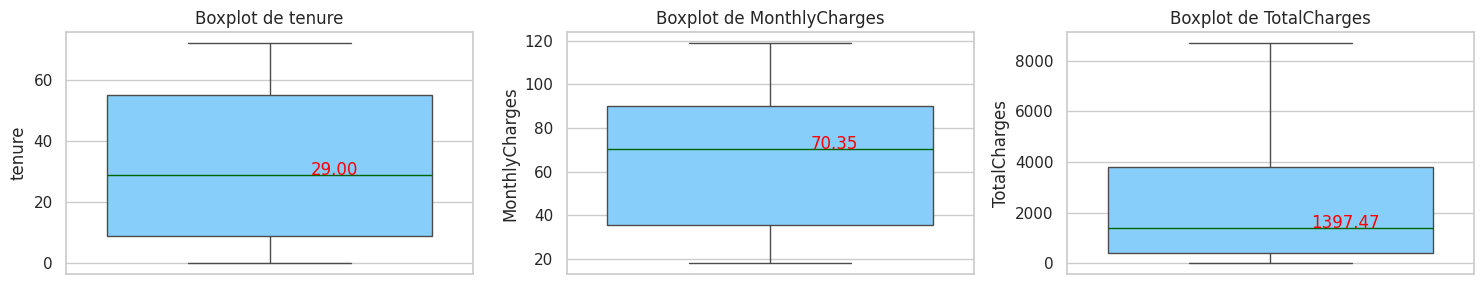

In [27]:
# Visualización de outliers en atributos numéricos
plt.figure(figsize=(15,3))
for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(1, 3, i + 1)

    # Convertimos la columna TotalCharges a numérica antes de calcular la mediana
    #data[col] = pd.to_numeric(data[col], errors='coerce')

    bp = sns.boxplot(y=data[col], medianprops={'color': 'darkgreen'},
                     patch_artist=True,
                     boxprops={'facecolor': 'lightskyblue'})
    median_val = data[col].median()
    plt.text(0.1, median_val, f'{median_val:.2f}',
             fontsize=12, color='red')

    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

### **Análisis de los Diagramas de Caja y Datos Estadísticos**

#### **Interpretación General**

##### Antigüedad (Tenure)

- **Distribución Sesgada a la Derecha:**  
  El diagrama de caja para la antigüedad probablemente muestra una distribución asimétrica con una cola extendida hacia la derecha. Esto indica que la mayoría de los clientes tiene un periodo corto de relación con la compañía, mientras que un grupo menor permanece por tiempos considerablemente más largos.

- **Amplio Rango:**  
  La caja abarca un rango considerable, lo que sugiere una alta variabilidad en la duración de la relación con los clientes.

- **Valores Atípicos:**  
  Se pueden observar algunos valores atípicos en el extremo superior, representando a aquellos clientes con una permanencia excepcionalmente larga.

##### Cargos Mensuales (MonthlyCharges)

- **Distribución Relativamente Simétrica:**  
  El diagrama de caja de los cargos mensuales es más simétrico en comparación con el de la antigüedad, lo que sugiere que la mayoría de los clientes paga montos similares mensualmente.

- **Rango Moderado:**  
  Los valores para los cargos mensuales presentan un rango menos extenso, indicando menor dispersión en comparación con la antigüedad.

- **Posibles Valores Atípicos:**  
  Puede haber algunos valores atípicos en ambos extremos (inferior y superior), señalando la existencia de clientes con cargos inusualmente bajos o altos.

##### Cargos Totales (TotalCharges)

- **Distribución Sesgada a la Derecha:**  
  Similar a la antigüedad, el diagrama de caja para los cargos totales muestra una asimetría hacia la derecha. Esto implica que la mayoría de los clientes acumula cargos totales relativamente bajos, mientras que un pequeño grupo alcanza montos elevados.

- **Rango Amplio:**  
  El rango de los cargos totales es el más extenso entre las tres variables, reflejando una gran variabilidad en los montos acumulados.

- **Valores Atípicos:**  
  Es posible identificar valores atípicos en el extremo superior, correspondientes a clientes con acumulaciones de cargos excepcionalmente altas.

#### **Posibles Implicaciones**

- **Antigüedad:**  
  La distribución sesgada a la derecha sugiere una mayor tasa de abandono en las etapas iniciales, que disminuye conforme los clientes permanecen más tiempo. Por ello, retener a los clientes a largo plazo es fundamental para la estabilidad de la compañía.

- **Cargos Mensuales:**  
  La distribución relativamente simétrica indica que la estructura de precios es equilibrada y se ajusta a una base de clientes diversa.

- **Cargos Totales:**  
  La asimetría observada en los cargos totales evidencia una relación directa entre la antigüedad del cliente y el monto acumulado en cargos. Los clientes con mayor permanencia tienden a generar cargos totales más elevados.


<ipython-input-28-c078901230b6>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


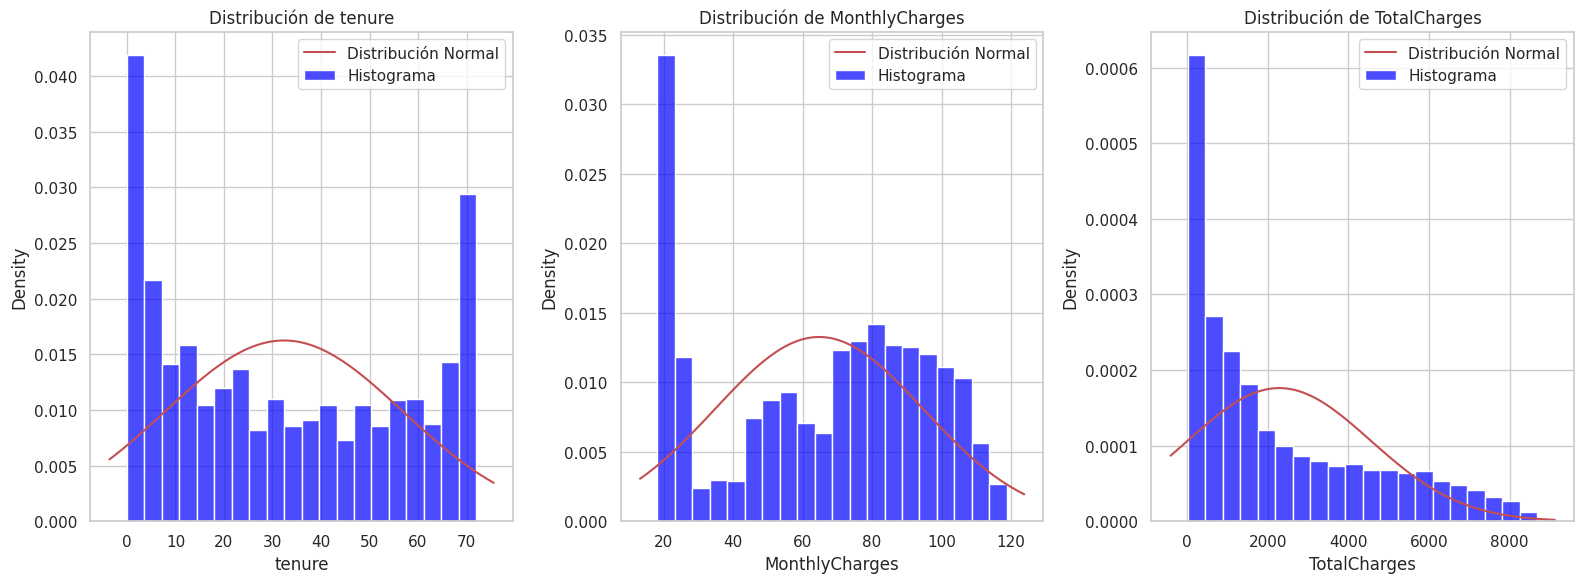

In [28]:
def graficarHistogramaDistNormal(data, numeric_features, figsize=(16, 6)):

    fig, axes = plt.subplots(1, len(numeric_features), figsize=figsize)

    for i, col in enumerate(numeric_features):
        sns.histplot(data[col], stat='density', ax=axes[i], color='blue', alpha=0.7, bins=20, label='Histograma')

        mu, std = stats.norm.fit(data[col].dropna())
        xmin, xmax = axes[i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        y = stats.norm.pdf(x, mu, std)


        axes[i].plot(x, y, 'r-', label='Distribución Normal')

        axes[i].set_title(f"Distribución de {col}")
        axes[i].legend()

    plt.tight_layout()
    plt.show()

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

graficarHistogramaDistNormal(data, numeric_features)

Los histogramas proporcionados ofrecen una visión clara de la distribución de las variables y es posible decir que:

### **Antigüedad - Permanencia del cliente (Tenure)**

- ** Distribución:**  
  La distribución de **Tenure** muestra una ligera **asimetría positiva**, con una cola derecha más larga. Esto indica que hay un mayor número de clientes con un período de suscripción más corto, pero también existe un grupo significativo de clientes de larga duración.

- ** Implicaciones:**  
  Esta distribución sugiere la presencia de diferentes **segmentos de clientes**:
  - **Clientes a corto plazo**: Probablemente más volátiles, con una mayor tasa de abandono.
  - **Clientes a largo plazo**: De mayor valor, con mayor probabilidad de permanencia.


### **Cargos Mensuales (MonthlyCharges)**

- ** Distribución:**  
  La distribución de **MonthlyCharges** se aproxima a una **distribución normal**, con una ligera **asimetría positiva**. Esto indica que la mayoría de los clientes paga un cargo mensual similar, aunque hay un grupo que paga tarifas más altas.

- ** Implicaciones:**  
  - La estrategia de precios de la compañía ha sido efectiva en atraer a una base de clientes con tarifas promedio.  
  - Existe un segmento de clientes dispuestos a pagar más por **servicios adicionales**.

### **Cargos Totales (TotalCharges)**

- **Distribución:**  
  La distribución de **TotalCharges** presenta una **asimetría positiva pronunciada**, con una cola derecha muy larga. Esto indica que la mayoría de los clientes tiene **cargos acumulados bajos**, mientras que un pequeño grupo ha generado **cargos significativamente altos**.

- **Implicaciones:**  
  - Existe una gran **variabilidad en el consumo de servicios** entre los clientes.  
  - Un pequeño grupo de clientes contribuye a una **parte importante de los ingresos**.


### **Análisis de Abandono (Churn) y Equilibrio del Dataset**

Exploramos cuántos puntos de datos de ***abandono (churn)*** tenemos.

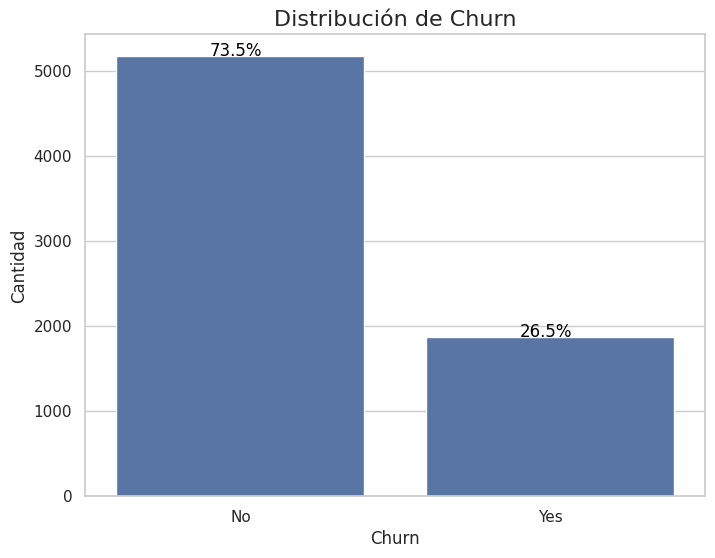


===== Total =====
Total Churn:  7043
Churn
No     5174
Yes    1869
Name: count, dtype: int64

===== Porcentaje de distribución =====
Churn
No    73.46%
Yes   26.54%


In [29]:
# Visualización de la variable objetivo (Churn)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Churn", data=data)
plt.title("Distribución de Churn", fontsize=16)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)

# Agregar porcentajes en las barras
total = len(data['Churn'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size=12, color='black')

plt.show()

# Mostrar porcentajes en la salida
churn_counts = data['Churn'].value_counts()
churn_percentage = (churn_counts / total) * 100

print('\n===== Total =====')
print('Total Churn: ',len(data['Churn']))
print(churn_counts)
print('\n===== Porcentaje de distribución =====')
print(churn_percentage.to_string(float_format='{:.2f}%'.format))  # Formato de porcentaje

**1. Volumen de datos de abandono**  
En primer lugar, se analizó la cantidad de clientes que se dieron de baja (churn = "Sí") en el dataset. Los resultados muestran que solo el **26.54%** de los registros corresponden a abandonos, una proporción significativamente menor al **50%** sugerido inicialmente por el equipo. Esto indica que, aunque el abandono es relevante, no representa la mitad de la base de clientes analizada.  

**2. Equilibrio de clases**  
Para validar la distribución de las clases (churn "Sí" vs. "No"), se generó un gráfico de barras comparativo. Los datos muestran que:  
- El **73.46%** de los clientes permanecen activos (churn = "No").  
- No hay un desbalance crítico (ej.: proporciones extremas como 90%-10%), lo que reduce la necesidad de técnicas de rebalanceo para modelado predictivo.  
Sin embargo, se confirma que la distribución **no es equitativa**, descartando la hipótesis inicial de una tasa de abandono del 50%.  


Ahora exploraremos algunas contingencias sobre cómo algunas características se relacionan con la rotación del cliente.

Creamos una tabla de contingencia inicial entre ***Churn y género***.

In [30]:
gender_churn_contingency = pd.crosstab(data["gender"], data["Churn"])
display(gender_churn_contingency)

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


Podemos ver que los hombres y las mujeres tienen aproximadamente la misma tasa de retiro, por lo que no hay mucho que ver aquí.

### **Análisis de si la forma en que un cliente paga tiene que ver con su tasa de abandono**

In [31]:
import plotly.express as px

payment_method_counts = data['PaymentMethod'].value_counts().reset_index()
payment_method_counts.columns = ['PaymentMethod', 'Count']


fig = px.bar(payment_method_counts,
             x='PaymentMethod',
             y='Count',
             title='Distribución de los Métodos de Pago',
             color='PaymentMethod',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text='Count',
             labels={'Count': 'Number of Customers'})


fig.update_layout(
    xaxis_title='Payment Method',
    yaxis_title='Number of Customers',
    showlegend=True
)

fig.show()

### Relación entre las instancias de ***soporte técnico y la tasa de abandono.***

<ipython-input-32-43114fe0931d>:13: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



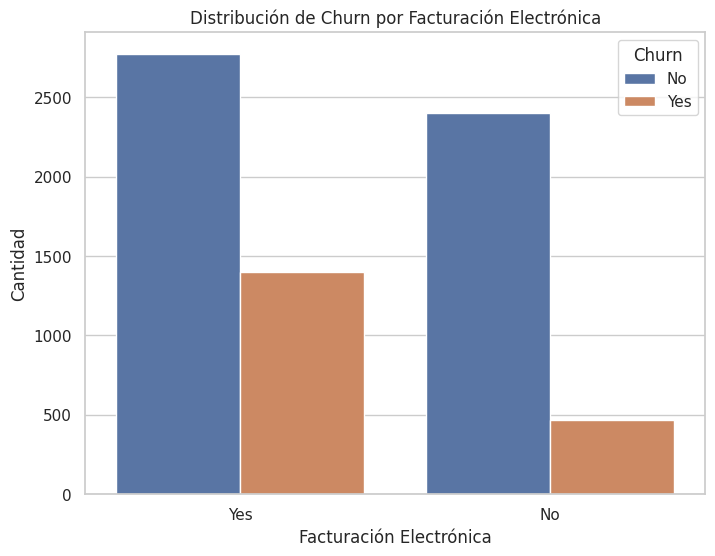

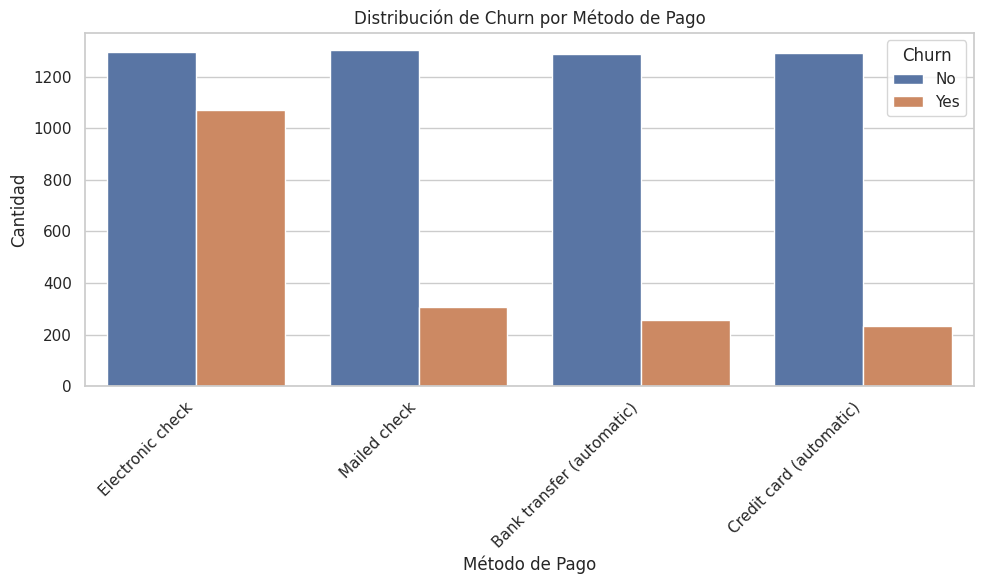

In [32]:
fig1, ax1 = plt.subplots(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=data, ax=ax1)
ax1.set_title("Distribución de Churn por Facturación Electrónica")
ax1.set_xlabel("Facturación Electrónica")
ax1.set_ylabel("Cantidad")


fig2, ax2 = plt.subplots(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, ax=ax2)
ax2.set_title("Distribución de Churn por Método de Pago")
ax2.set_xlabel("Método de Pago")
ax2.set_ylabel("Cantidad")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


Podemos ver que los clientes que utilizan la facturación electrónica tienen muchas más probabilidades de abandonar el servicio (***0 = no tienen facturación electrónica***).

De igual forma, es posible observar que los clientes que tienen el método de pago ***0 (cheque electrónico)*** tienen muchas más probabilidades de abandonar el servicio.

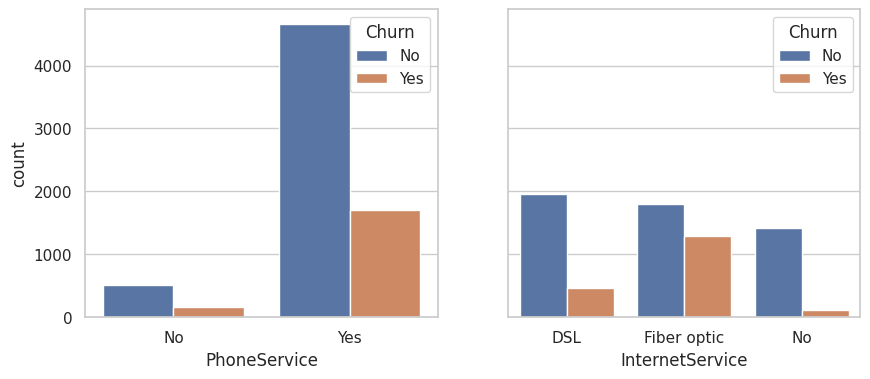

In [33]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x='PhoneService', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='InternetService', hue='Churn',
              data=data, ax=axes[1]);


- Si no tienen servicio telefónico, es más probable que abandonen el servicio.
- Si no tienen servicio de Internet, es más probable que abandonen el servicio. Los clientes con el servicio de Internet más alto son los que tienen menos probabilidades de abandonar el servicio.

**Conclusión:** Esto tiene sentido, dado que los clientes con otros productos de la empresa y productos premium abandonan menos el servicio Una posible solución sería que la empresa ofreciera a los clientes estos productos adicionales, tal vez incluso con un gran descuento, para que los acepten y tengan menos probabilidades de abandonar el servicio.

### **Relación entre las instancias de soporte técnico y la tasa de abandono**

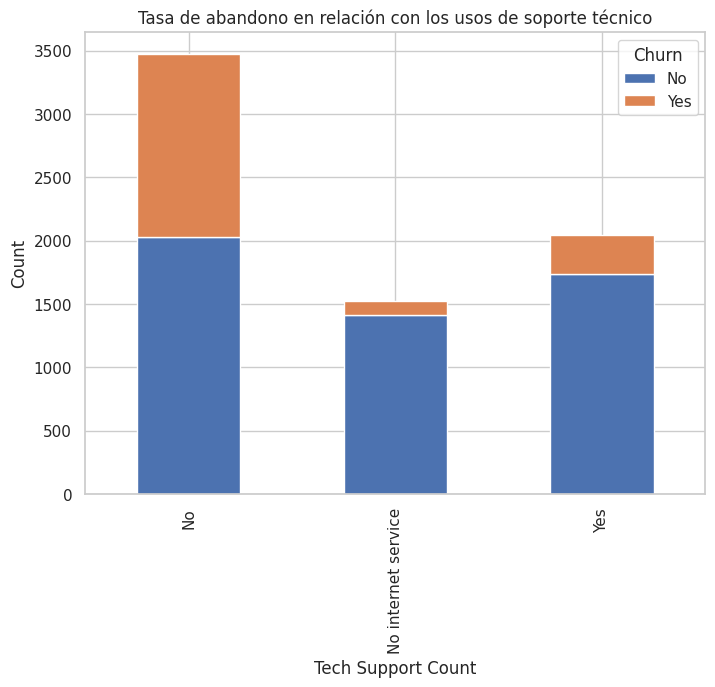

In [34]:
tech_support_churn = pd.crosstab(data['TechSupport'], data['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Tasa de abandono en relación con los usos de soporte técnico')
plt.show()

Podemos ver que los clientes que no abandonan utilizan el ***soporte técnico ***con más frecuencia que los clientes que terminan abandonando.

Así que, podemos explorar algunas formas de lograr que las personas utilicen el ***soporte técnico*** con más frecuencia para que cancelen (***churn***) menos.

Además, el soporte técnico en estos datos es solo un S/N, sería útil en el futuro incluir cuántas llamadas de soporte técnico realiza cada cliente para que podamos analizar cómo se relaciona la cantidad de llamadas de soporte técnico con la tasa de abandono.

### **Tasa de abandono (Churn) en relación con la antigüedad (Ternure)**

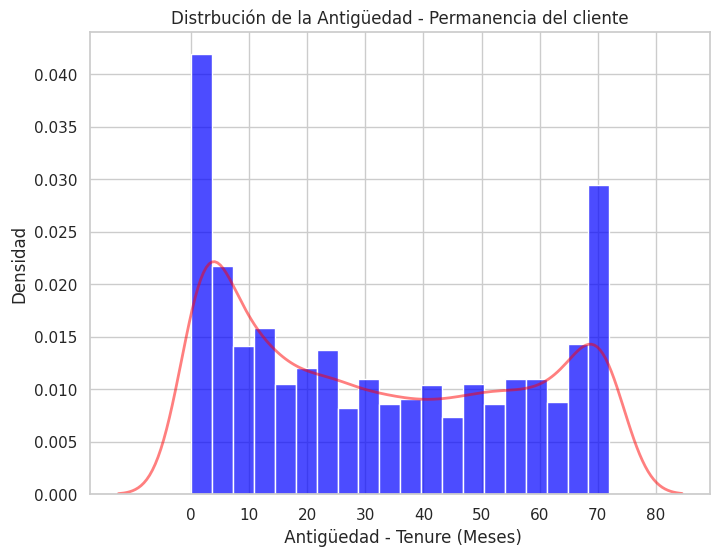

In [35]:
sns.kdeplot(data['tenure'],
            color='red',
            fill=False,
            alpha=0.5,
            linewidth=2)

sns.histplot(data['tenure'],
             stat='density',
             color='blue',
             alpha=0.7,
             bins=20)

plt.title('Distrbución de la Antigüedad - Permanencia del cliente')
plt.xlabel(' Antigüedad - Tenure (Meses)')
plt.ylabel('Densidad')
plt.grid(True)

# Set x-axis ticks to intervals of 10
plt.xticks(range(0, data['tenure'].max() + 10, 10))

plt.show()

El gráfico de la distribución de observaciones para la tenencia, muestra que la duración máxima es de ***70 meses***. Esto debe ser cuando finaliza el historial de datos

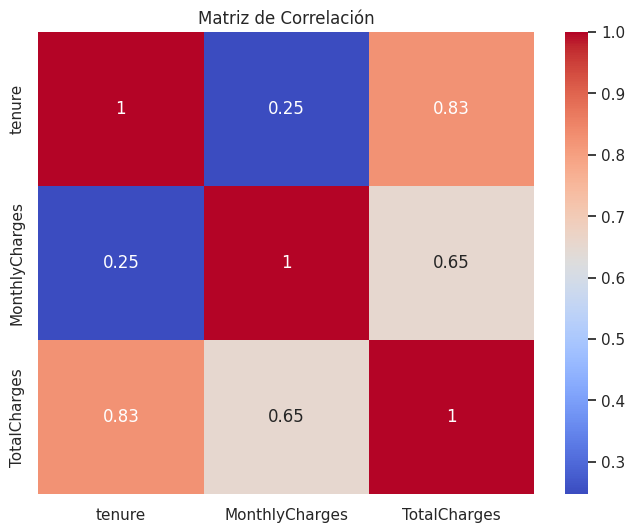

In [36]:
# Heatmap de correlación entre variables numéricas
sns.heatmap(data[numeric_features].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## 3. Preprocesamiento de Datos

Se procede a convertir las variables categóricas a numéricas (mediante One-Hot Encoding), normalizar las variables numéricas y preparar el dataset para el modelado.


Analizamos si hay datos no numéricos en la columna 'TotalCharges' ya que se mostraba como un objeto en lugar de float64.

In [37]:
print(data['TotalCharges'].dtype)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
print(data['TotalCharges'].dtype)
data.loc[data['TotalCharges'].isna()==True]
data.head()

float64
float64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Arriba vemos que los "TotalCharges" en blanco aparecen cuando los clientes tienen una antigüedad de 0 meses, por lo que cambiaremos esos valores a $0.

In [38]:
data[data['TotalCharges'].isna()==True] = 0
data['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

Como en el anterior gráfico de ***Tasa de abandono en relación con los usos de soporte técnico*** teníamos la columna de ***No internet service***, se realiza el One Hot Encoding para codificarlos como ***cero (0) y uno (1)***

In [39]:
data.shape

(7043, 21)

A continuación convertiremos los valores categóricos en valores numéricos.

In [40]:
data['gender'].replace(['Male','Female'],[0,1],inplace=True)
data['Partner'].replace(['Yes','No'],[1,0],inplace=True)
data['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
data['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
data['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
data['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
data['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
data['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
data['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
data['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
data['Churn'].replace(['Yes','No'],[1,0],inplace=True)


<ipython-input-40-edc1c753099f>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-40-edc1c753099f>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-40-edc1c753099f>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignme

In [41]:
data.info()
print("\n")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


Ahora observaremos las relaciones entre los datos de los clientes y la pérdida de clientes mediante la correlación.

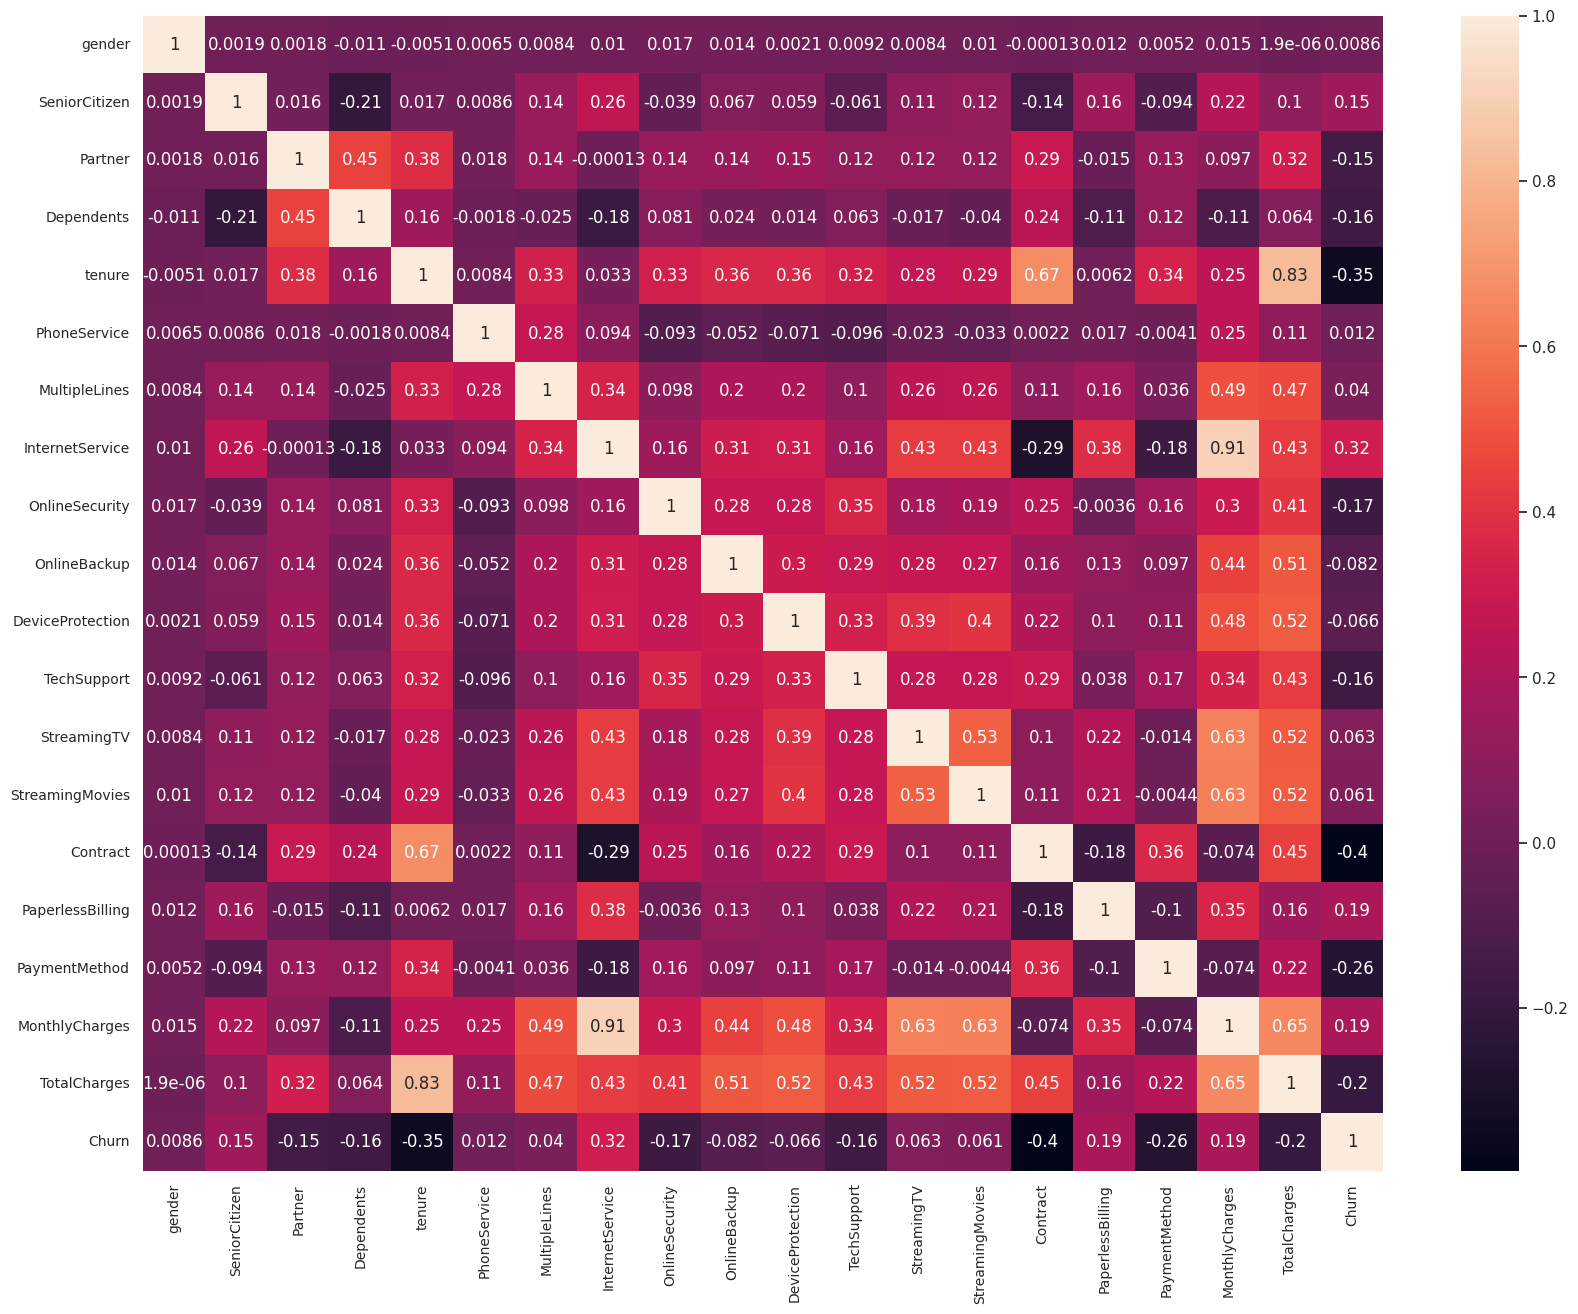

In [42]:
# Eliminamos esa columna ya que no aporta nada a nuestro análisis
data_numeric = data.drop(columns=['customerID'])
corr = data_numeric.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Dado que nuestro objetivo es evitar la multicolinealidad descartando características que están estrechamente correlacionadas entre sí. Por ejemplo, aquí se trata de ***TotalCharges*** y ***MonthlyCharges***. Por lo tanto, descartaremos ***TotalCharges***.

In [43]:
data.pop('TotalCharges')

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


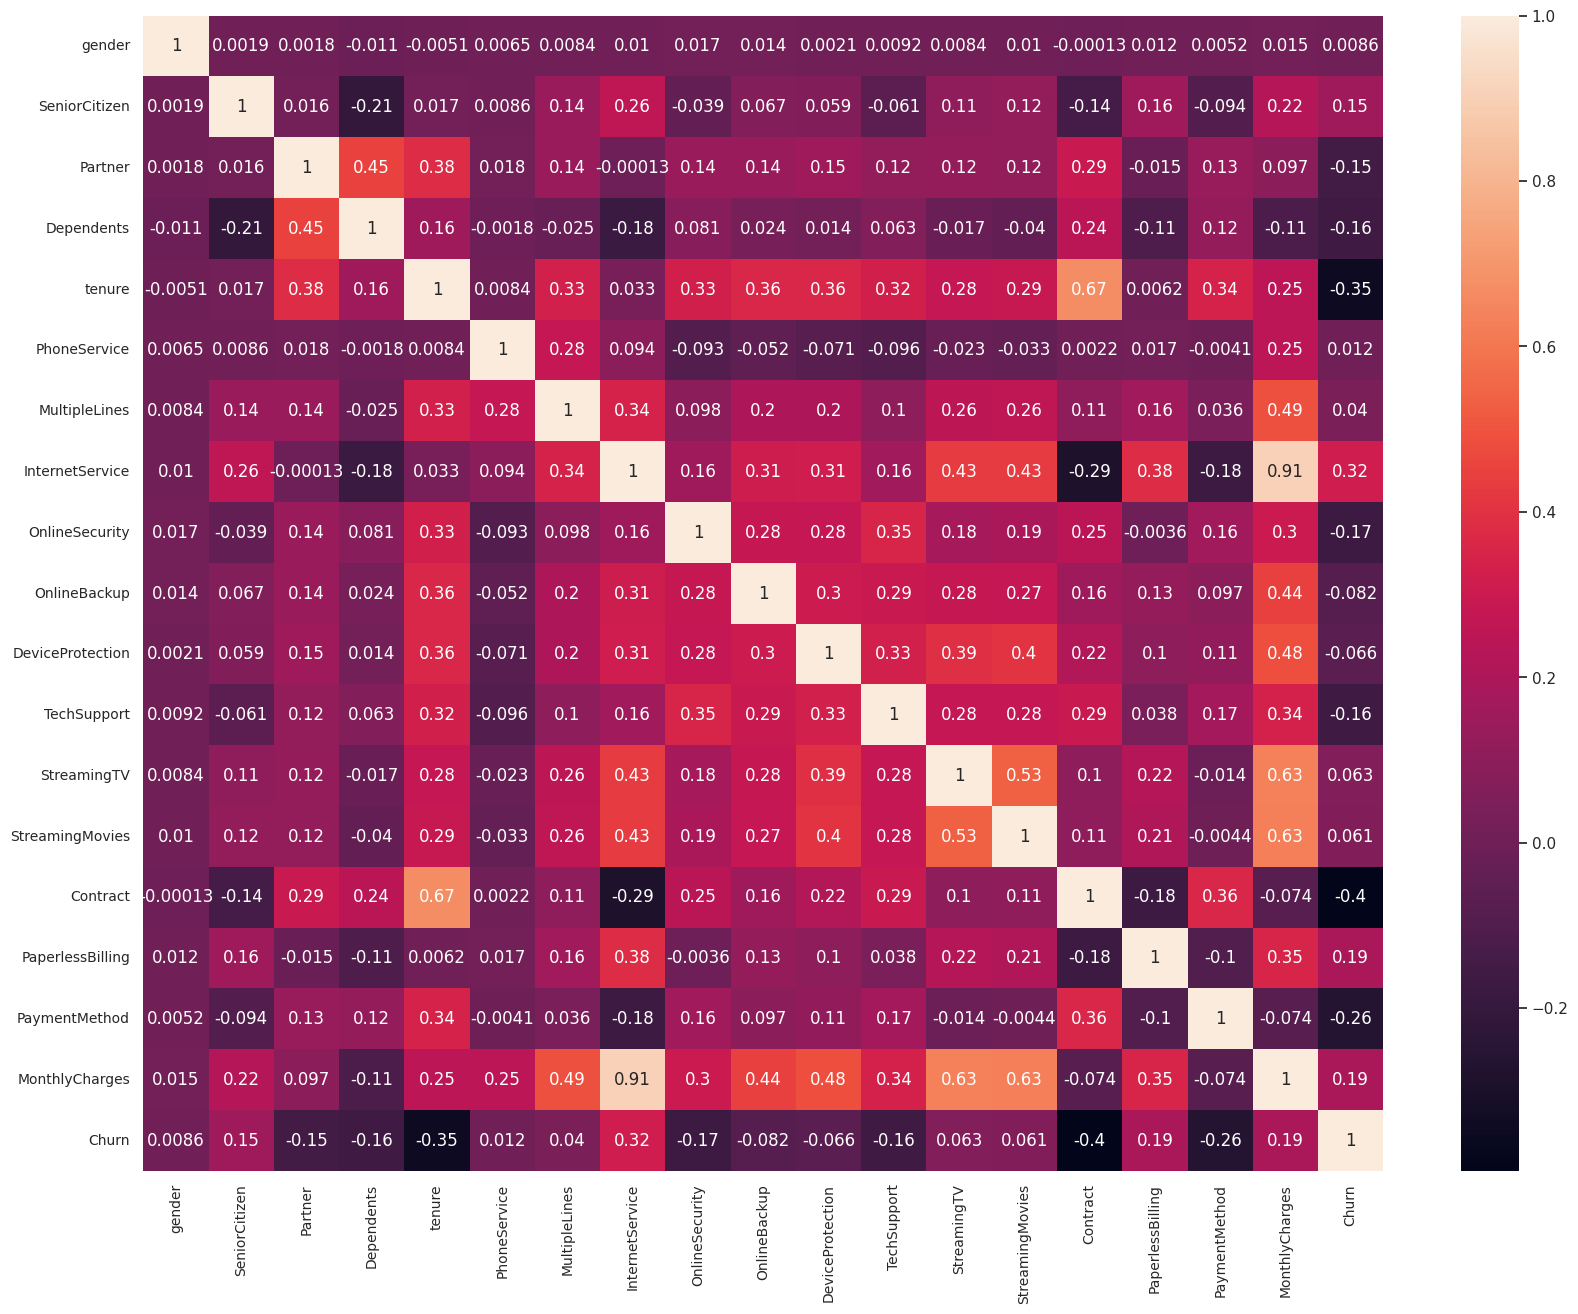

In [45]:
data_numeric = data.drop(columns=['customerID'])
corr = data_numeric.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Exploramos cuántos puntos de datos de ***abandono (churn)*** tenemos.

In [46]:
print(len(data['Churn']))

7043


Analizamos cuántos clientes de este conjunto de datos se han dado de baja. ¿Este conjunto de datos es del 50 %, como sugiere el equipo, la tasa general de abandono de clientes?

In [47]:
data['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


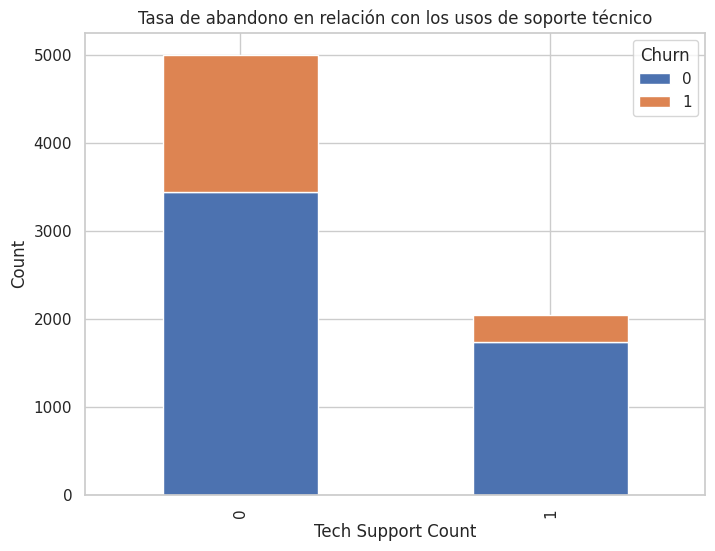

In [48]:
tech_support_churn = pd.crosstab(data['TechSupport'], data['Churn'])
tech_support_churn.plot(kind = 'bar', stacked = True)
plt.ylabel('Count')
plt.xlabel('Tech Support Count')
plt.title('Tasa de abandono en relación con los usos de soporte técnico')
plt.show()

### Tasa de abandono (Churn) en relación con la antigüedad (Ternure)

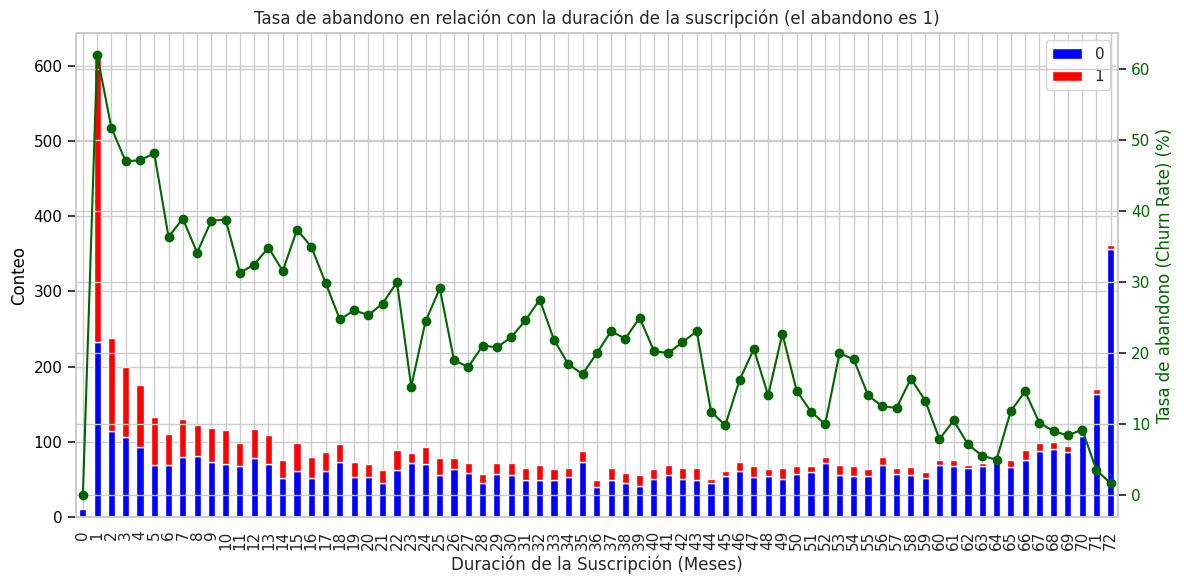

In [49]:
tenure_churn = pd.crosstab(data['tenure'], data['Churn'])

tenure_churn['Churn Rate'] = tenure_churn[1] / (tenure_churn[0] + tenure_churn[1]) * 100


fig, ax1 = plt.subplots(figsize=(12, 6))


tenure_churn[[0, 1]].plot(kind='bar', stacked=True, ax=ax1, color=['blue', 'red'])
ax1.set_ylabel('Conteo', color='black')
ax1.tick_params('y', labelcolor='black')
ax1.set_xlabel('Duración de la Suscripción (Meses)')
ax1.set_title('Tasa de abandono en relación con la duración de la suscripción (el abandono es 1)')
ax1.legend(['0', '1'], loc='upper right')


ax2 = ax1.twinx()
ax2.plot(tenure_churn.index, tenure_churn['Churn Rate'], color='darkgreen', marker='o')
ax2.set_ylabel('Tasa de abandono (Churn Rate) (%)', color='darkgreen')
ax2.tick_params('y', labelcolor='darkgreen')


plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

El análisis del gráfico revela una relación inversa clave entre la duración de la suscripción y la tasa de abandono: a mayor tiempo de permanencia del cliente, menor es la probabilidad de que cancele el servicio.

- Se identifican picos de abandono notables, especialmente en los primeros meses (con un pico máximo en el primer mes) y alrededor del mes 70, lo que sugiere posibles puntos críticos en la experiencia del cliente.

- La distribución de la duración de la suscripción permite segmentar a los clientes en grupos diferenciados (nuevos, a corto plazo, mediano plazo y largo plazo), cada uno con patrones de abandono distintos.

In [50]:
# Distribución de los features.
features = ['gender', 'SeniorCitizen','Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
data[features].describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000


## 4. División del Dataset

Se divide el dataset en conjuntos de entrenamiento y prueba, utilizando estratificación para mantener el balance de clases.


In [ ]:
X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)


Tamaño entrenamiento: (5634, 20)
Tamaño prueba: (1409, 20)


## 5. Modelado

Se implementan los cuatro modelos propuestos. En cada caso se utiliza un pipeline que integra el preprocesamiento y el clasificador.


### 5.1 Hipótesis 1: Regresión Logística

Se utiliza regresión logística con balanceo de clases. Es un modelo interpretable y sencillo.


In [ ]:
from imblearn.over_sampling import SMOTE

X_train = X_train.drop('customerID', axis=1)
X_test = X_test.drop('customerID', axis=1)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


scores_lr = cross_val_score(pipeline_lr, X_train_resampled, y_train_resampled, cv=10, scoring='roc_auc')
print("AUC-ROC (Regresión Logística):", np.mean(scores_lr))


pipeline_lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = pipeline_lr.predict(X_test)
print("\nReporte de Clasificación - Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

KeyError: "['customerID'] not found in axis"

# NO

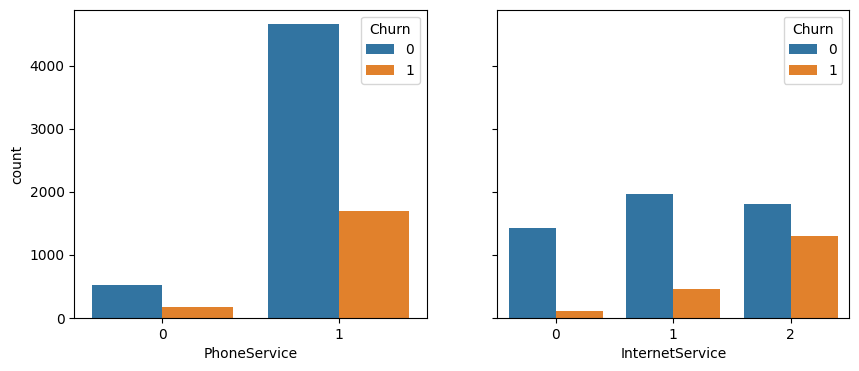

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
sns.countplot(x='PhoneService', hue='Churn',
              data=data, ax=axes[0]);
sns.countplot(x='InternetService', hue='Churn',
              data=data, ax=axes[1]);


- Si no tienen servicio telefónico, es más probable que abandonen el servicio.
- Si no tienen servicio de Internet, es más probable que abandonen el servicio. Los clientes con el servicio de Internet más alto son los que tienen menos probabilidades de abandonar el servicio.

**Conclusión:** Esto tiene sentido, dado que los clientes con otros productos de la empresa y productos premium abandonan menos el servicio Una posible solución sería que la empresa ofreciera a los clientes estos productos adicionales, tal vez incluso con un gran descuento, para que los acepten y tengan menos probabilidades de abandonar el servicio.

# Modelado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn',axis=1),
                                                    data['Churn'], test_size=0.30,
                                                    random_state=101)

In [ ]:
train=pd.concat([X_train,y_train],axis=1)

### Función para estimar el mejor valor de n_estimators y ajustar el modelo con los datos dados.

In [ ]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):

    if useTrainCV:
        # Obtener los parámetros de xgboost
        xgb_param = alg.get_xgb_params()

        # Convertir a una estructura de datos usada internamente por xgboost para la eficiencia
        # y la velocidad del entrenamiento
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)

        # xgb.cv se usa para encontrar el número de estimadores requeridos para los parámetros
        # que se han establecido
        cvresult = xgb.cv(xgb_param, xgtrain,
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)

        # Establecer el parámetro n_estimators usando set_params
        alg.set_params(n_estimators=cvresult.shape[0])

        print(alg.get_xgb_params())

    # Ajustar el algoritmo a los datos
    # El parámetro eval_metric se ha movido a xgb.train
    alg.fit(dtrain[predictors], dtrain['Churn'])

    return alg

### Función para obtener el ***Accuracy*** del modelo en los datos de prueba dadas las características consideradas.

In [ ]:
from sklearn import metrics

def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(X_test[predictors])
    dtrain_predprob = alg.predict_proba(X_test[predictors])[:,1]
    print ("\nInforme del Modelo")
    print ("Precisión : %.4g" % metrics.accuracy_score(y_test.values,
                                                      dtrain_predictions))
    print ("Puntuación AUC (Entrenamiento): %f" % metrics.roc_auc_score(y_test.values,
                                                           dtrain_predprob))

# Función para obtener los features importantes en función del ajuste del modelo.

In [ ]:
def get_feature_importances(alg):
    #to get the feature importances based on xgboost we use fscore
    feat_imp = pd.Series(alg._Booster.get_fscore()).sort_values(ascending=False)
    print(feat_imp)

    #this shows the feature importances on a bar chart
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
target = 'Churn'
IDcol = 'customerID'

# Selección de modelos, predicciones y métricas

In [ ]:
!pip install xgboost

In [ ]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

### Función para devolver la lista de predictores.
Estos son los parámetros iniciales antes del tuning

In [ ]:
def drop_features(l):
    return [x for x in train.columns if x not in l]

### Primera predicción: uso de parámetros iniciales y sin ingeniería de características

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Churn'])

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'eval_metric': None, 'gamma': 0, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=33, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
get_accuracy(first_model, predictors)


Informe del Modelo
Precisión : 0.8055
Puntuación AUC (Entrenamiento): 0.848949


MonthlyCharges      240.0
tenure              184.0
PaymentMethod        71.0
Contract             46.0
InternetService      44.0
SeniorCitizen        34.0
PhoneService         28.0
PaperlessBilling     26.0
Partner              26.0
TechSupport          25.0
OnlineSecurity       25.0
OnlineBackup         25.0
StreamingTV          22.0
MultipleLines        22.0
DeviceProtection     20.0
StreamingMovies      20.0
gender               19.0
Dependents           19.0
dtype: float64


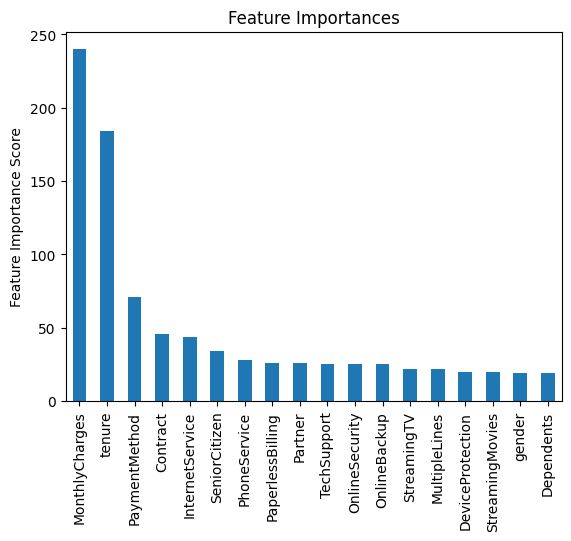

In [ ]:
get_feature_importances(first_model)

### Segunda predicción: uso de parámetros iniciales y eliminación de características de menor importancia

In [ ]:
dropl=['DeviceProtection','Dependents','Dependents','gender','StreamingMovies','MultipleLines']

In [ ]:
dropl_first=dropl+[target,IDcol]

In [ ]:
predictors = drop_features(dropl_first)
xgb1 = XgbClass()
second_model=modelfit(xgb1, train, predictors)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'eval_metric': None, 'gamma': 0, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
get_accuracy(second_model,predictors)


Informe del Modelo
Precisión : 0.805
Puntuación AUC (Entrenamiento): 0.848861


MonthlyCharges      378.0
tenure              178.0
PaymentMethod        80.0
Contract             59.0
InternetService      46.0
PaperlessBilling     46.0
OnlineBackup         42.0
SeniorCitizen        40.0
TechSupport          37.0
Partner              34.0
StreamingTV          33.0
OnlineSecurity       33.0
PhoneService         24.0
dtype: float64


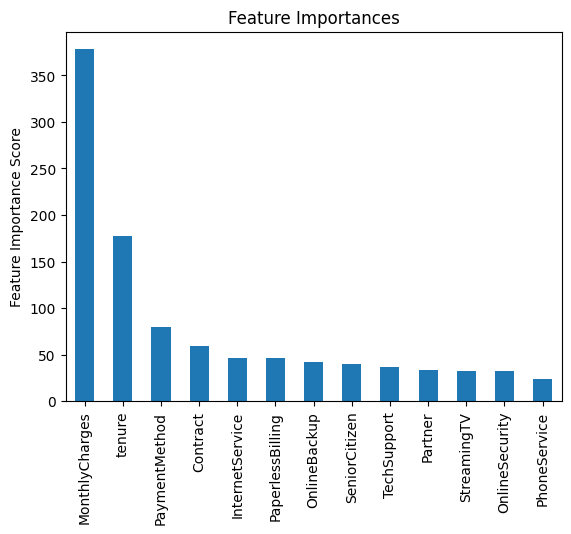

In [ ]:
get_feature_importances(second_model)

### Tercera predicción: nuevamente eliminando las características de menor importancia

In [ ]:
dropl1=dropl+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']
dropl_second=dropl_first+['Partner','PhoneService','OnlineBackup','TechSupport','OnlineSecurity']

In [ ]:
predictors=drop_features(dropl_second)

In [ ]:
xgb1=XgbClass()
third_model=modelfit(xgb1,train,predictors)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'eval_metric': None, 'gamma': 0, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 1, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [ ]:
get_accuracy(third_model,predictors)


Informe del Modelo
Precisión : 0.8036
Puntuación AUC (Entrenamiento): 0.844985


MonthlyCharges      347.0
tenure              256.0
PaymentMethod        87.0
InternetService      64.0
Contract             52.0
PaperlessBilling     51.0
StreamingTV          39.0
SeniorCitizen        39.0
dtype: float64


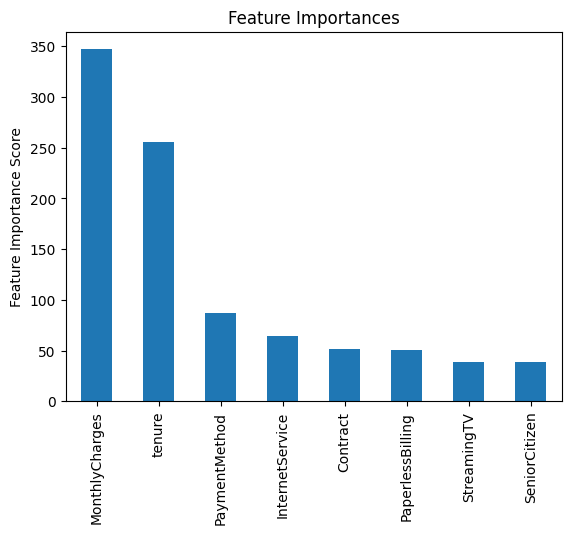

In [ ]:
get_feature_importances(third_model)